<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE6_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[0])
print("Path to dataset file:", path)

100%|██████████| 340k/340k [00:00<00:00, 25.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1
Archivos en la carpeta: ['CC GENERAL.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1/CC GENERAL.csv


In [4]:
# Cargar datos
df = pd.read_csv(path)
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-n

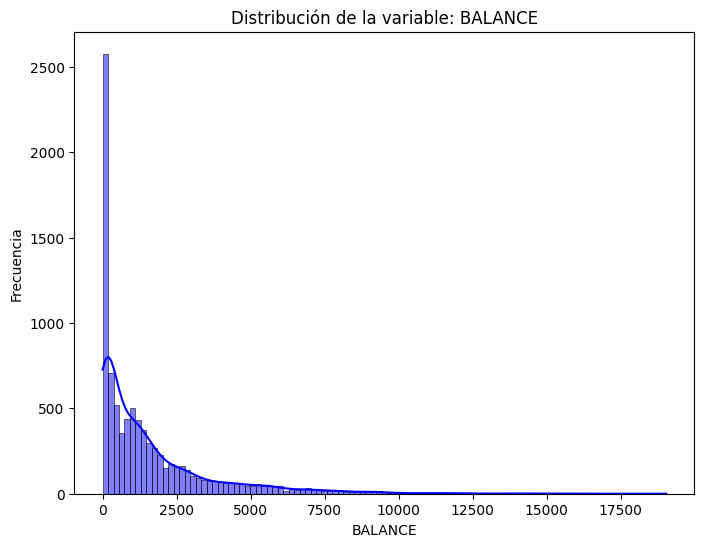

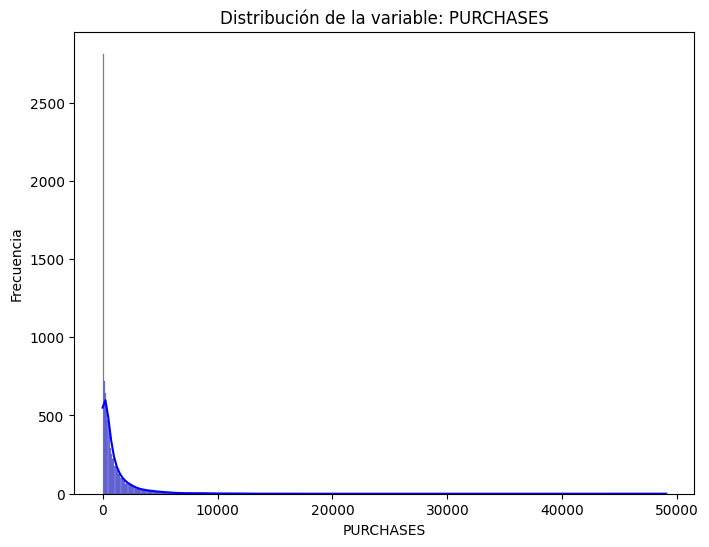

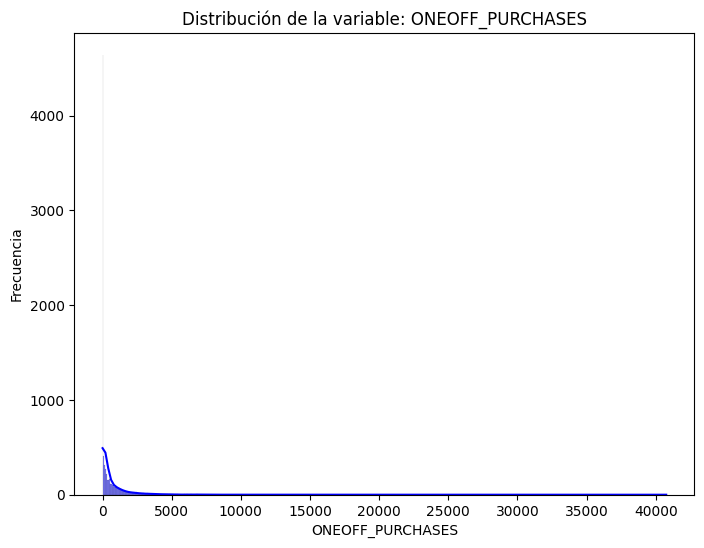

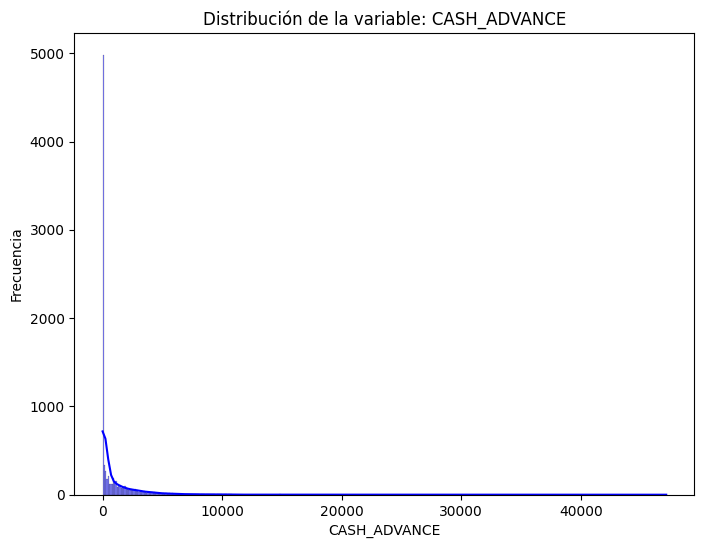

In [7]:
# Exploración inicial
print("Información del dataset:")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

# Identificar valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values[missing_values > 0])

# Estadísticas descriptivas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe())

# Visualización inicial de las variables clave
variables_interes = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE']
for var in variables_interes:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, color='blue')
    plt.title(f"Distribución de la variable: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


<ipython-input-8-436f1189f67a>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-8-436f1189f67a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl


Valores faltantes después de la limpieza:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Primeras filas del dataframe con características relevantes (estandarizadas):
    BALANCE  PURCHASES  ONEOFF_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0 -0.877821  -0.729687         -0.692383     -0.673507            -0.806490   
1  1.178546  -0.838160 

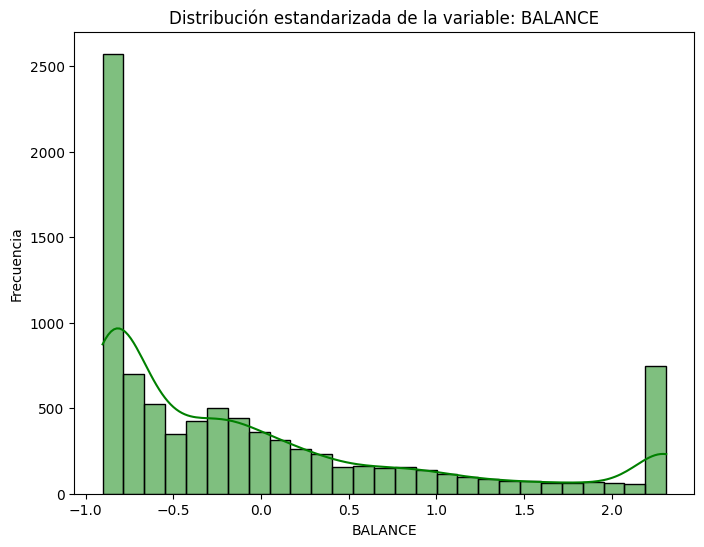

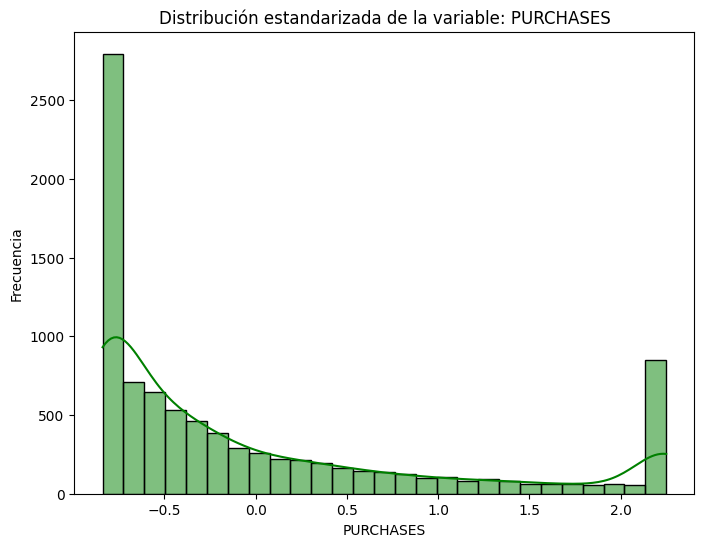

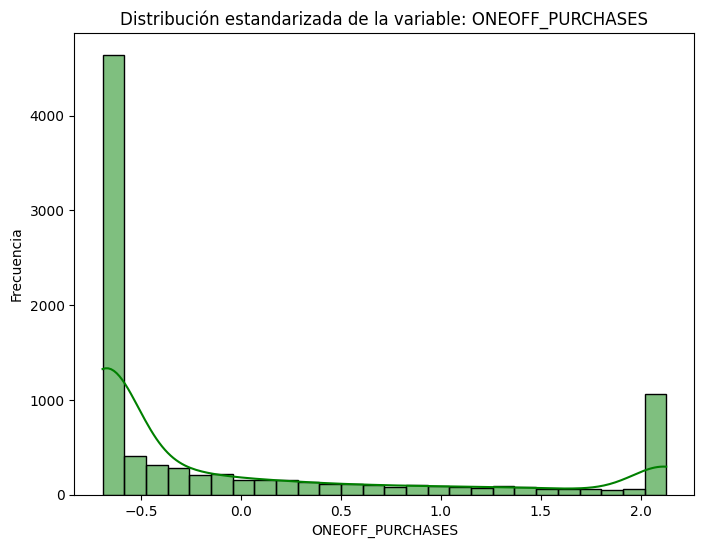

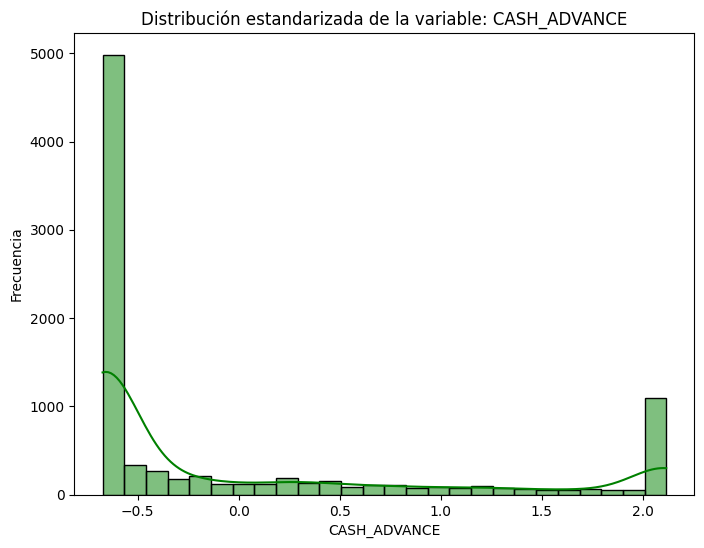

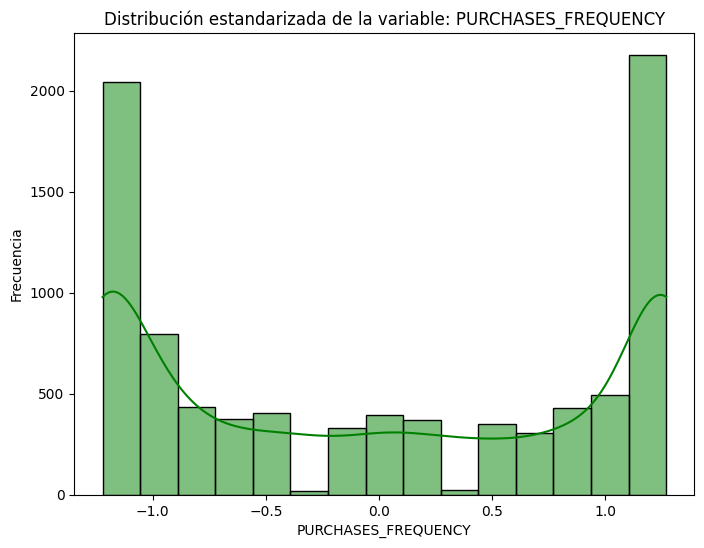

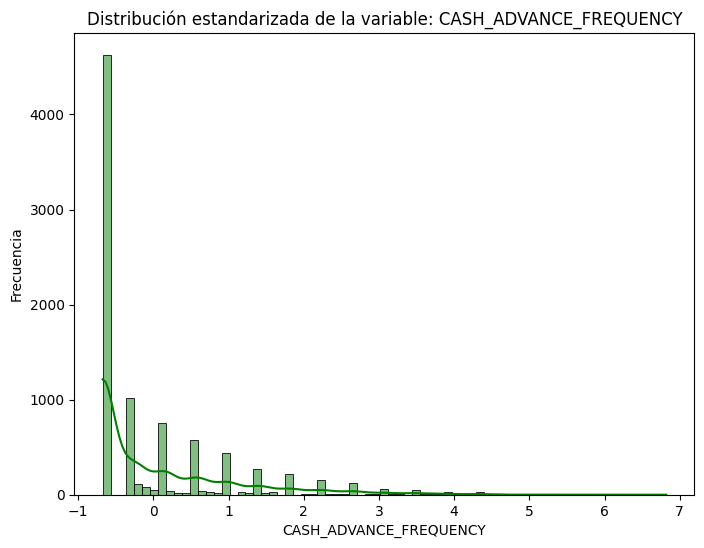

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Identificación y manejo de valores atípicos (outliers)
# Usaremos el rango intercuartil (IQR) para detectar outliers en las variables numéricas clave
variables_clave = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE']
for var in variables_clave:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Reemplazar outliers con los límites inferiores y superiores
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])

# 2. Manejo de valores nulos
# Ya vimos en el paso anterior que las columnas 'CREDIT_LIMIT' y 'MINIMUM_PAYMENTS' tienen valores nulos
# Imputar con la mediana
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verificar nuevamente los valores nulos
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())

# 3. Estandarización de variables numéricas
# Variables seleccionadas para estandarizar
variables_para_estandarizar = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

# Estandarización usando StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()  # Crear una copia del dataframe original
df_scaled[variables_para_estandarizar] = scaler.fit_transform(df[variables_para_estandarizar])

# 4. Selección de características relevantes
# Seleccionamos columnas relacionadas con compras y frecuencia de uso
caracteristicas_relevantes = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE',
    'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'
]
df_relevantes = df_scaled[caracteristicas_relevantes]

print("\nPrimeras filas del dataframe con características relevantes (estandarizadas):")
print(df_relevantes.head())

# Visualización de las distribuciones después de estandarización
for var in caracteristicas_relevantes:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_relevantes[var], kde=True, color='green')
    plt.title(f"Distribución estandarizada de la variable: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


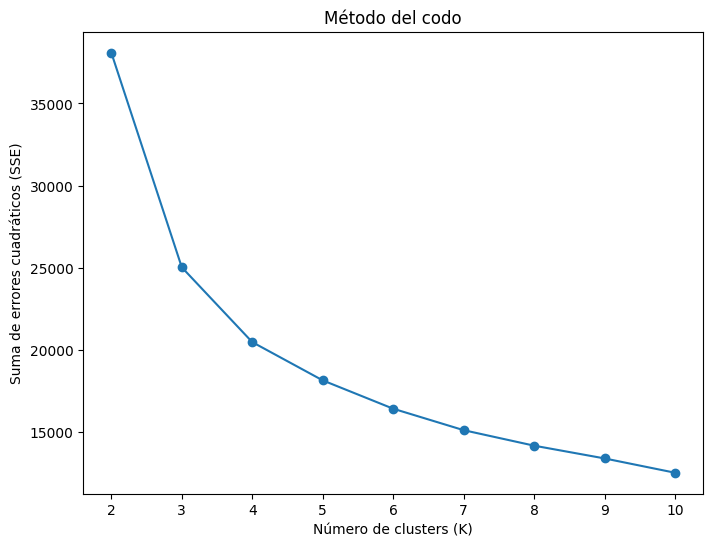

<ipython-input-9-65b9af63f004>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_KMeans'] = kmeans.fit_predict(df_relevantes)


Silhouette Score para K-means con K=4: 0.4508


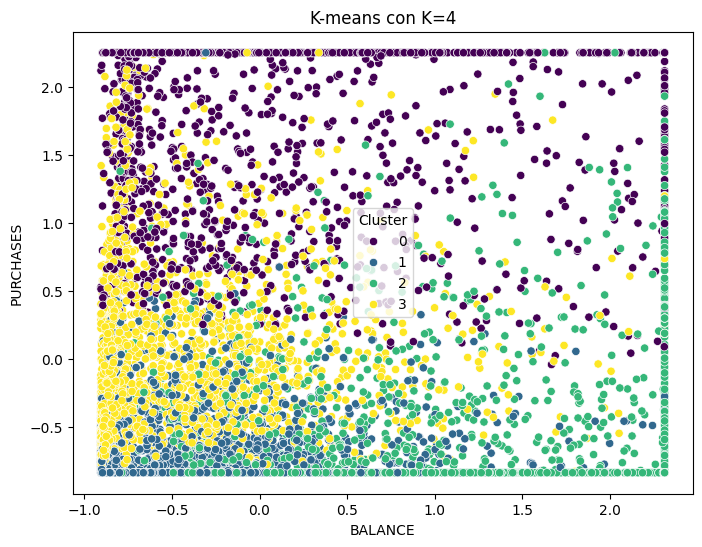

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Determinar el número óptimo de clusters utilizando el método del codo
sse = []
k_values = range(2, 11)  # Probaremos valores de K entre 2 y 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_relevantes)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Suma de errores cuadráticos (SSE)")
plt.show()

# Elegir el número óptimo de clusters (por ejemplo, K=4)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_relevantes['Cluster_KMeans'] = kmeans.fit_predict(df_relevantes)

# Calcular el Silhouette Score para evaluar la cohesión de los clusters
silhouette_kmeans = silhouette_score(df_relevantes, df_relevantes['Cluster_KMeans'])
print(f"Silhouette Score para K-means con K={k_optimo}: {silhouette_kmeans:.4f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_relevantes['BALANCE'],
    y=df_relevantes['PURCHASES'],
    hue=df_relevantes['Cluster_KMeans'],
    palette='viridis'
)
plt.title(f"K-means con K={k_optimo}")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.show()


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=0.5, min_samples=5 -> Silhouette Score: 0.4706


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=0.5, min_samples=10 -> Silhouette Score: 0.4742


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=1.0, min_samples=5 -> Silhouette Score: 0.4733


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=1.0, min_samples=10 -> Silhouette Score: 0.4801


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=1.5, min_samples=5 -> Silhouette Score: 0.4140


<ipython-input-10-125e1e366e13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)


DBSCAN con eps=1.5, min_samples=10 -> Silhouette Score: 0.4187


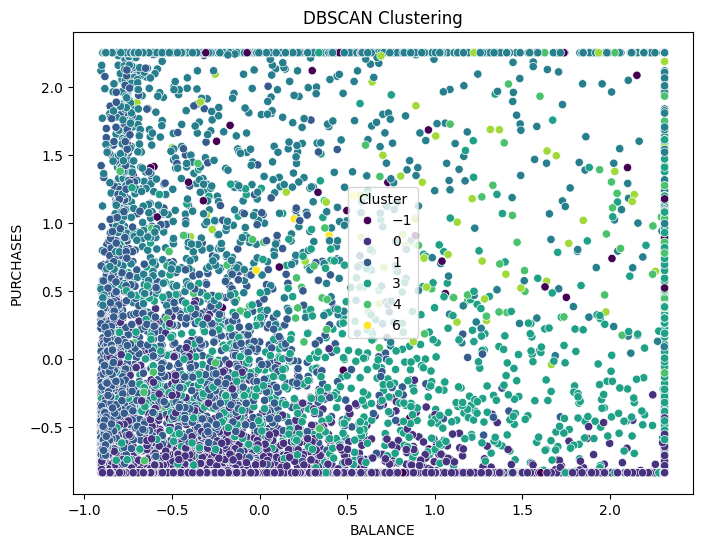

In [10]:
from sklearn.cluster import DBSCAN

# Probar diferentes valores de epsilon (eps) y min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df_relevantes['Cluster_DBSCAN'] = dbscan.fit_predict(df_relevantes)

        # Calcular Silhouette Score para DBSCAN (ignorar los outliers -1)
        dbscan_labels = df_relevantes['Cluster_DBSCAN']
        if len(set(dbscan_labels)) > 1:  # Asegurarse de que haya más de 1 cluster
            silhouette_dbscan = silhouette_score(
                df_relevantes, dbscan_labels, metric='euclidean'
            )
            print(f"DBSCAN con eps={eps}, min_samples={min_samples} -> Silhouette Score: {silhouette_dbscan:.4f}")
        else:
            print(f"DBSCAN con eps={eps}, min_samples={min_samples} no encontró clusters válidos.")

# Visualización de los clusters formados por DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_relevantes['BALANCE'],
    y=df_relevantes['PURCHASES'],
    hue=df_relevantes['Cluster_DBSCAN'],
    palette='viridis'
)
plt.title("DBSCAN Clustering")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.show()


In [11]:
from sklearn.metrics import calinski_harabasz_score

# K-means: Métricas de evaluación
kmeans_labels = df_relevantes['Cluster_KMeans']
silhouette_kmeans = silhouette_score(df_relevantes, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(df_relevantes, kmeans_labels)

print(f"K-means Metrics:")
print(f"  Silhouette Score: {silhouette_kmeans:.4f}")
print(f"  Calinski-Harabasz Index: {calinski_kmeans:.4f}")

# DBSCAN: Métricas de evaluación
dbscan_labels = df_relevantes['Cluster_DBSCAN']

# Validar que DBSCAN generó clusters válidos (excluyendo -1)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(df_relevantes, dbscan_labels)
    calinski_dbscan = calinski_harabasz_score(df_relevantes, dbscan_labels)

    print(f"\nDBSCAN Metrics:")
    print(f"  Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"  Calinski-Harabasz Index: {calinski_dbscan:.4f}")
else:
    print("\nDBSCAN no generó clusters válidos para las configuraciones dadas.")


K-means Metrics:
  Silhouette Score: 0.4292
  Calinski-Harabasz Index: 4991.0246

DBSCAN Metrics:
  Silhouette Score: 0.4187
  Calinski-Harabasz Index: 2372.6936


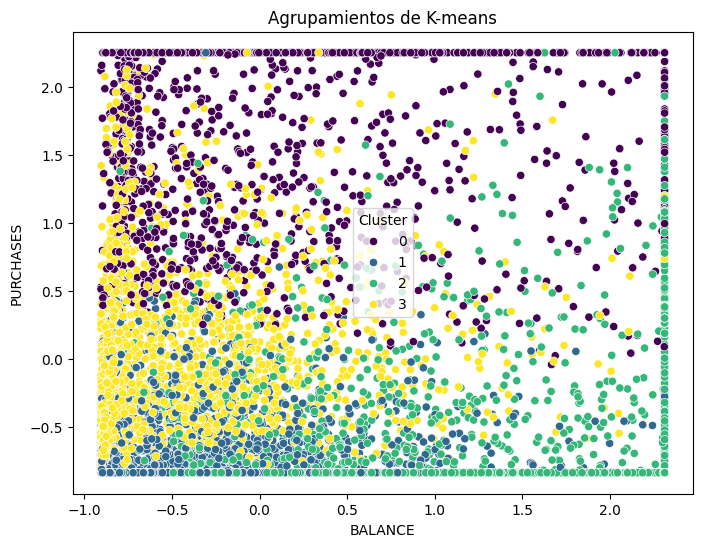

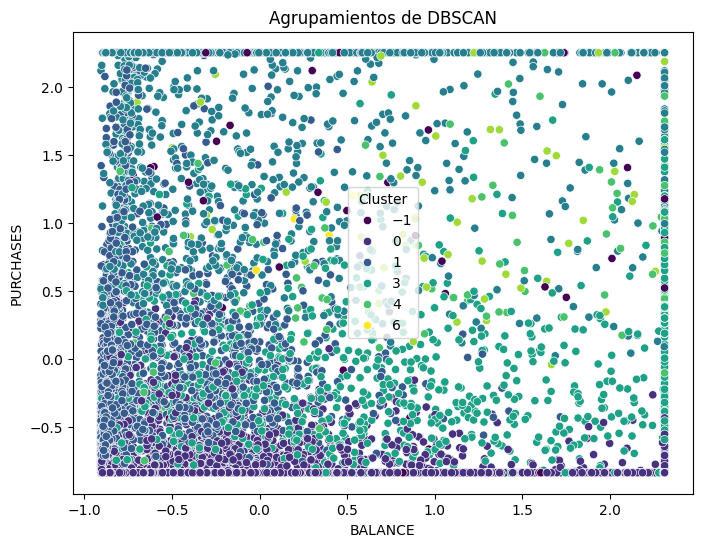

In [12]:
# Visualización de agrupamientos de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_relevantes['BALANCE'],
    y=df_relevantes['PURCHASES'],
    hue=kmeans_labels,
    palette='viridis'
)
plt.title("Agrupamientos de K-means")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.show()

# Visualización de agrupamientos de DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_relevantes['BALANCE'],
    y=df_relevantes['PURCHASES'],
    hue=dbscan_labels,
    palette='viridis'
)
plt.title("Agrupamientos de DBSCAN")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.show()
